# SENTIMENT CLASSIFICATION ON NEWS HEADLINE

In [268]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import pickle

# TRAINING DATA


In [269]:
train = pd.read_csv('C:/Users/vaibh/OneDrive/Desktop/Sentiment_dataset.csv')
print(train.shape)

(848, 5)


In [270]:
train.head()

,news_title,reddit_title,sentiment,text,url
0,Mark Cuban launches generic drug company,Billionaire Mark Cuban just launched a drug co...,1.0,Billionaire investor and Shark Tank star Mark ...,https://www.beckershospitalreview.com/pharmacy...
1,From Defendant to Defender: One Wrongfully Con...,"Man falsely imprisoned for 10 years, uses pris...",1.0,Attorney Jarrett Adams recently helped overtur...,https://www.nbcnews.com/news/us-news/defendant...
2,"Amazon Tribe Wins Lawsuit Against Big Oil, Sav...",Amazon tribe wins legal battle against oil com...,1.0,The Amazon Rainforest is well known across the...,https://www.disclose.tv/amazon-tribe-wins-laws...
3,Newark police: No officer fired a single shot ...,Newark police: No officer fired a single shot ...,1.0,Newark police: No officer fired a single shot ...,https://newjersey.news12.com/newark-police-no-...
4,Ingen barn døde i trafikken i 2019,No children died in traffic accidents in Norwa...,1.0,I 1970 døde det 560 mennesker i den norske tra...,https://www.nrk.no/trondelag/ingen-barn-dode-i...


In [271]:
train.isnull().any()

news_title      False
reddit_title    False
sentiment       False
text            False
url             False
dtype: bool

In [272]:
train[train['sentiment'] ==1].head()

,news_title,reddit_title,sentiment,text,url
0,Mark Cuban launches generic drug company,Billionaire Mark Cuban just launched a drug co...,1.0,Billionaire investor and Shark Tank star Mark ...,https://www.beckershospitalreview.com/pharmacy...
1,From Defendant to Defender: One Wrongfully Con...,"Man falsely imprisoned for 10 years, uses pris...",1.0,Attorney Jarrett Adams recently helped overtur...,https://www.nbcnews.com/news/us-news/defendant...
2,"Amazon Tribe Wins Lawsuit Against Big Oil, Sav...",Amazon tribe wins legal battle against oil com...,1.0,The Amazon Rainforest is well known across the...,https://www.disclose.tv/amazon-tribe-wins-laws...
3,Newark police: No officer fired a single shot ...,Newark police: No officer fired a single shot ...,1.0,Newark police: No officer fired a single shot ...,https://newjersey.news12.com/newark-police-no-...
4,Ingen barn døde i trafikken i 2019,No children died in traffic accidents in Norwa...,1.0,I 1970 døde det 560 mennesker i den norske tra...,https://www.nrk.no/trondelag/ingen-barn-dode-i...


In [273]:
train[train['sentiment'] == 0].head()

,news_title,reddit_title,sentiment,text,url
748,National Museum of Brazil,First skull was from a woman who lived about 1...,0.0,"Museum in Rio de Janeiro, Brazil\n\nThe Histor...",http://en.wikipedia.org/wiki/National_Museum_o...
749,Canada receives 9/11 'threat' from Saudi Arabia,Canadа receives 9/11 'threat' from Saudi Arabia,0.0,Saudi Arabia's state media on Monday tweeted a...,http://www.businessinsider.co.za/Trending/sdfs...
750,‘Unwavering support’ against ‘Iranian aggressi...,Israel welcomes record $38bn US military aid,0.0,Benjamin Netanyahu has welcomed a historic $38...,https://www.rt.com/news/440177-israel-us-milit...
751,"Some 60,000 California homeless could get coro...","Some 60,000 California homeless could get coro...",0.0,By Dan Whitcomb\n\nLOS ANGELES (Reuters) - Mod...,https://news.yahoo.com/california-governor-say...
752,Больше половины краж в Казахстане не раскрываю...,More than half of thefts in Kazakstan are not ...,0.0,"По данным Министерства внутренних дел, в 2017 ...",https://tengrinews.kz/crime/bolshe-polovinyi-k...


In [274]:
train.groupby('sentiment').describe()

news_title         \
               count unique   
sentiment                     
0.0              100    100   
1.0              748    747   

                                                                   \
                                                         top freq   
sentiment                                                           
0.0        Powerful quakes buckle Alaska roads, briefly t...    1   
1.0        Republic of Congo names new national park, hom...    2   

          reddit_title         \
                 count unique   
sentiment                       
0.0                100    100   
1.0                748    748   

                                                                   text  \
                                                         top freq count   
sentiment                                                                 
0.0        Ukraine closes border to Russian men of combat...    1   100   
1.0        N.J. woman uses couponing to feed 30,000 peopl...    1   748   

                                                                          \
          unique                                                top freq   
sentiment                                                                  
0.0          100  AP — It became easy, in recent years, to dismi...    1   
1.0          747  The new Ogooué-Leketi National Park is the Rep...    2   

            url                                                                 
          count unique                                                top freq  
sentiment                                                                       
0.0         100    100  https://www.thesun.ie/news/3382643/men-killed-...    1  
1.0         748    748  https://www.channelnewsasia.com/news/asia/baby...    1

# REPRESENTATION OF TEXT DATA INTO GRAPH


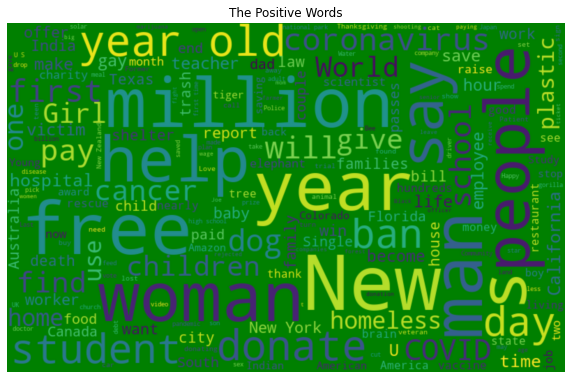

In [275]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in train['news_title'][train['sentiment'] == 1]])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

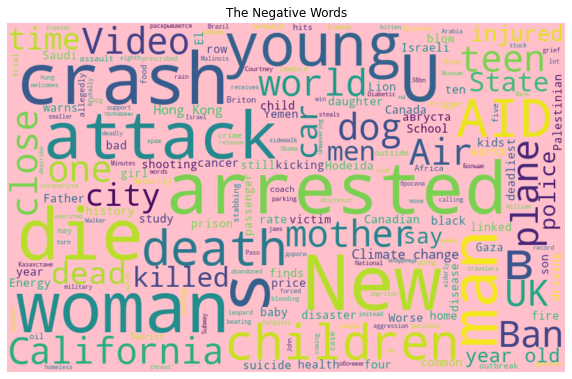

In [276]:
negative_words =' '.join([text for text in train['news_title'][train['sentiment'] == 0]])

wordcloud = WordCloud(background_color = 'pink', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [277]:
tokenized_news = train['news_title'].apply(lambda x: x.split()) 
print(tokenized_news)

0        [Mark, Cuban, launches, generic, drug, company]
1      [From, Defendant, to, Defender:, One, Wrongful...
2      [Amazon, Tribe, Wins, Lawsuit, Against, Big, O...
3      [Newark, police:, No, officer, fired, a, singl...
4             [Ingen, barn, døde, i, trafikken, i, 2019]
                             ...                        
843    [Dee, Why, attack:, Man, allegedly, choked, an...
844    [Africa:, Children, and, HIV/Aids, -, 'We, Nee...
845            [Terrorism, suspected, in, Eilat, attack]
846    [Anti-Semitism, never, disappeared, in, Europe...
847    [Five, dead,, 32, injured, in, Hong, Kong, coa...
Name: news_title, Length: 848, dtype: object


In [278]:
from gensim.models.doc2vec import TaggedDocument

In [279]:
def add_label(nws):
    output = []
    for i, s in zip(nws.index, nws):
        output.append(TaggedDocument(s, ["news_title_" + str(i)]))
    return output

# label all the news
labeled_news = add_label(tokenized_news)

labeled_news[:6]

[TaggedDocument(words=['Mark', 'Cuban', 'launches', 'generic', 'drug', 'company'], tags=['news_title_0']),
 TaggedDocument(words=['From', 'Defendant', 'to', 'Defender:', 'One', 'Wrongfully', 'Convicted', 'Man', 'Frees', 'Another'], tags=['news_title_1']),
 TaggedDocument(words=['Amazon', 'Tribe', 'Wins', 'Lawsuit', 'Against', 'Big', 'Oil,', 'Saving', 'Millions', 'Of', 'Acres', 'Of', 'Rainforest'], tags=['news_title_2']),
 TaggedDocument(words=['Newark', 'police:', 'No', 'officer', 'fired', 'a', 'single', 'shot', 'in', '2020,', 'thanks', 'to', 'de-escalation', 'program'], tags=['news_title_3']),
 TaggedDocument(words=['Ingen', 'barn', 'døde', 'i', 'trafikken', 'i', '2019'], tags=['news_title_4']),
 TaggedDocument(words=['Budweiser', 'will', 'sit', 'out', 'Super', 'Bowl,', 'funneling', 'marketing', 'dollars', 'to', 'boost', 'vaccine', 'awareness'], tags=['news_title_5'])]

In [280]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [281]:
train_corpus = []

for i in range(0, 848):
  review = re.sub('[^a-zA-Z]', ' ', train['news_title'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  

  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [282]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2853)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(848, 2853)
(848,)


In [259]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25,random_state = 42)


print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(636, 2853)
(212, 2853)
(636,)
(212,)


In [283]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)


In [261]:
print(x_train.shape)
print(x_valid.shape)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2853)
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))


(636, 2853)
(212, 2853)
Training Accuracy : 0.9952830188679245


In [284]:
X=train['news_title']
tfidf=TfidfVectorizer(max_features=2853, ngram_range=(1,2))
X=tfidf.fit_transform(X)
y=train['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
clf=LinearSVC()
clf.fit(X_train, y_train)
print("Accuracy :",clf.score(X_test,y_test))
y_pred=clf.predict(X_test)
#confusion matrix
print("f1 score :", f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

(678, 2853)
(170, 2853)
Accuracy : 0.8941176470588236
f1 score : 0.9437500000000001
[[  1  15]
 [  3 151]]


In [285]:
import pickle
pickle.dump(clf, open('my_model.pickle', 'wb'))
pickle.dump(tfidf, open('count_tfid.pickle', 'wb'))

In [ ]:
x ='Amazon Tribe Wins Lawsuit Against Big Oil, Saving Millions Of Acres Of Rainforest'
vec= tfidf.transform([x])

# RESULT

In [ ]:
check=clf.predict(vec)

if check == [1]:
   print("positive")
else:
   print("negative")

In [292]:
x ='Terrorism suspected in Eilat attack'
vec= tfidf.transform([x])


In [293]:

check=clf.predict(vec)

if check == [1]:
   print("positive")
else:
   print("negative")

negative
